In [103]:
import csv

import numpy as np
import sklearn
from sklearn.datasets import make_classification
import warnings
import pandas as pd
import argparse
import sys
from io import StringIO
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import statistics

Read from DAT

In [2]:
batches = list()
dataBatches = []
for i in range(1,11):
    batch1="globalDatasets/gas/batch"+str(i)+".dat"

    print("Reading Dataset Batch" + str(i))
    with open(batch1) as f:
        data = f.readlines()
    dataS = []
    for lines in data:
        dataS.append(lines.replace(";", " "))
    df = pd.read_csv(StringIO(dataS[0]),
                     sep="\s+",  # separator whitespace
                     header=None)


    for n in range(1,len(dataS)):
        tmp = pd.read_csv(StringIO(dataS[n]),
                          sep="\s+",  # separator whitespace
                          header=None)
        df=pd.concat([df,tmp])

    for c in df.columns.values:
       if c > 1:
            df[c] = df[c].apply(lambda x: float(str(x).split(':')[1]))
    dataBatches.append(df)

Reading Dataset Batch1
Reading Dataset Batch2
Reading Dataset Batch3
Reading Dataset Batch4
Reading Dataset Batch5
Reading Dataset Batch6
Reading Dataset Batch7
Reading Dataset Batch8
Reading Dataset Batch9
Reading Dataset Batch10


SAVE FROM DAT TO CSV

In [6]:
#for i in range(0,10):
#    batchName="globalDatasets/gas/batch"+str(i+1)+".csv"
#    dataBatches[i].to_csv(batchName,index=False)

In [4]:
dataBatches[10]

IndexError: list index out of range

In [3]:
batches = pd.concat([dataBatches[0],dataBatches[1],dataBatches[9]])
batches = pd.concat([dataBatches[0],dataBatches[1],dataBatches[2],dataBatches[3],dataBatches[7],dataBatches[8],dataBatches[9]])

In [4]:
batches=dataBatches[0]
for i in range(1,10):
    batches = pd.concat([batches,dataBatches[i]])

In [4]:
rah = ["y"]
for i in range(1,batches.columns[-1]+1):
    nam = "x"+str(i)
    rah.append(nam)

In [5]:
batches= batches.set_axis(rah, axis='columns')

In [6]:
batches = batches.apply(pd.to_numeric)
batches.to_csv("batches1-4_8-10.csv",index=False)

In [32]:
np.unique(batches[0])

KeyError: 0

In [13]:
import arff
arff.dump('batch1-2-10.arff.arff'
      , batches.values
      , relation='relation name'
      , names=batches.columns)

In [2]:
dataBatches = []
for i in range(0,10):
    batchName="globalDatasets/gas/batch"+str(i+1)+".csv"
    dataBatches.append(pd.read_csv(batchName))

In [63]:
classes = []
for i in range(1,8):
    classes.append([])
for i in range(0,10):
    for j in range(1,7):
        classes[j].append(round((dataBatches[i].iloc[:,0].tolist().count(j)/dataBatches[i].iloc[:,0].count())*100,2))

In [71]:
df = pd.DataFrame(classes[1], columns=['Gas1'])


In [78]:
for i in range(2,7):
    df=pd.concat([df,pd.DataFrame(classes[i], columns=['Gas'+str(i)])],axis=1)

In [84]:
df.index=range(1,11)
df

,Gas1,Gas2,Gas3,Gas4,Gas5,Gas6
1,20.22,22.02,18.65,6.74,15.73,16.63
2,13.18,26.85,8.04,8.76,42.77,0.40
3,23.01,30.90,13.62,15.13,17.34,0.00
4,39.75,26.71,7.45,18.63,7.45,0.00
5,14.21,20.30,10.15,23.35,31.98,0.00
6,22.35,24.96,4.78,1.26,26.35,20.30
7,17.96,18.32,9.96,20.59,17.44,15.72
8,10.20,10.20,13.61,11.22,48.64,6.12
9,12.98,11.70,21.28,15.96,16.60,21.49
10,16.67,16.67,16.67,16.67,16.67,16.67


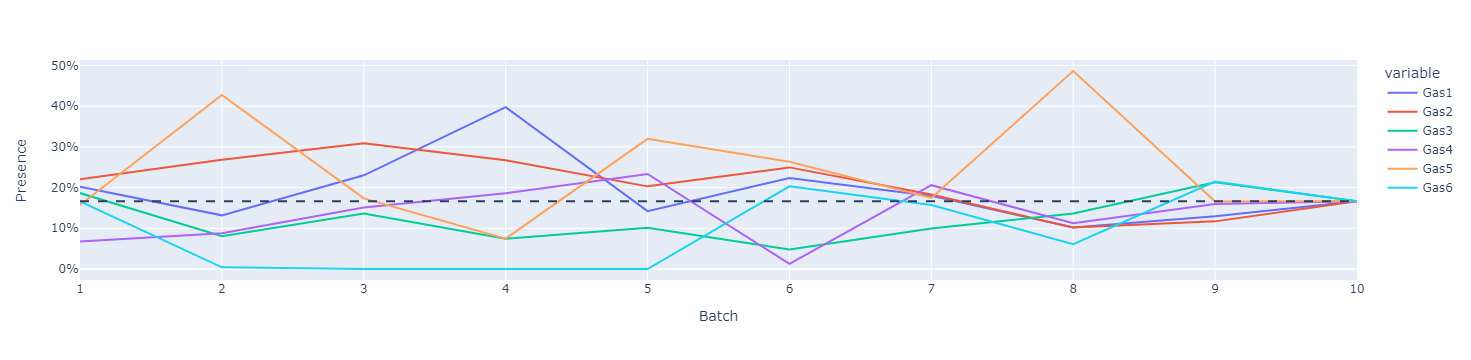

In [97]:
fig = px.line(df)
fig.update_layout(
    yaxis = dict(
        title="Presence",
        ticksuffix= "%"
    ),
    xaxis = dict(
        title="Batch"
    ),
)
fig.add_hline(y=100/6,line_dash="dash")
fig.show()

In [165]:
for i in range(0,10):
    df_corr = dataBatches[i].corr()["0"].abs().sort_values(ascending=False)
    df_corr= df_corr[df_corr>0.1]
    print("Batch "+str(i+1)+" Correlations")
    print(df_corr.head())
    print("-----------------------")

Batch 1 Correlations
0     1.000000
67    0.548483
66    0.545511
10    0.524272
75    0.520117
Name: 0, dtype: float64
-----------------------
Batch 2 Correlations
0     1.000000
73    0.765155
17    0.752257
10    0.744940
9     0.732046
Name: 0, dtype: float64
-----------------------
Batch 3 Correlations
0      1.000000
102    0.774804
101    0.759421
110    0.758232
109    0.750638
Name: 0, dtype: float64
-----------------------
Batch 4 Correlations
0      1.000000
109    0.761423
101    0.728836
125    0.708660
53     0.697581
Name: 0, dtype: float64
-----------------------
Batch 5 Correlations
0      1.000000
10     0.677146
109    0.637669
2      0.635065
101    0.616052
Name: 0, dtype: float64
-----------------------
Batch 6 Correlations
0      1.000000
110    0.738998
126    0.725275
54     0.724279
102    0.724099
Name: 0, dtype: float64
-----------------------
Batch 7 Correlations
0      1.000000
110    0.664583
102    0.656641
109    0.651559
101    0.643262
Name: 0, dtype:

Correlações em geral mudam muito de batch para batch

In [186]:
dic = dict()
for i in range(0,129):
    dic[i]=0
for i in range(0,10):
    X = dataBatches[i].iloc[:,:-1]
    y = dataBatches[i].iloc[:,-1]
    sc = StandardScaler()
    X_scaled = sc.fit_transform(X)
    pca = PCA(n_components=0.9)
    pca.fit(X_scaled)
    print("Batch "+str(i+1)+" Explained Variances by each PC")
    print(pca.explained_variance_ratio_)
    print("\n")
    for j in range(0,len(pca.components_)):
        sorted_indices = np.argsort(np.absolute(pca.components_[j]))
        #print(np.absolute(pca.components_[i][sorted_indices[::-1][:10]]))
        print("As 10 colunas que mais explicam a componente "+str(j+1))
        print(sorted_indices[::-1][:10])
        if j==0:
            for k in sorted_indices[::-1][:10]:
                dic[k]=dic[k]+1
    print("-----------------------")



Batch 1 Explained Variances by each PC
[0.57180086 0.23789875 0.0822176  0.02886527]


As 10 colunas que mais explicam a componente 1
[124  52 116  60  95  96  58  26  18 122]
As 10 colunas que mais explicam a componente 2
[66 10 74  2 71 15 72 79 12 16]
As 10 colunas que mais explicam a componente 3
[  1  51  59 115 123  19  83  27  42  34]
As 10 colunas que mais explicam a componente 4
[ 67  11  75   3 110 102 101  46  38 109]
-----------------------
Batch 2 Explained Variances by each PC
[0.41867034 0.23443593 0.08234217 0.06164285 0.04052149 0.03074249
 0.02462407 0.02118694]


As 10 colunas que mais explicam a componente 1
[ 56  64  63 120  55  90 128  82  95  58]
As 10 colunas que mais explicam a componente 2
[10  2 15 66 72  7 71 73 81 80]
As 10 colunas que mais explicam a componente 3
[  3  11  43  38  59  51  46  35 110  37]
As 10 colunas que mais explicam a componente 4
[ 49 113 105  97  89  57  48  41  65 112]
As 10 colunas que mais explicam a componente 5
[ 67  75 107  99  

PCA - Primeiras 3 componente de cada batch explica maioria (perto de 90%)


In [277]:
dic2 ={ k:[v] for (k,v) in dic.items() if v >= 1}


In [278]:
df2 = pd.DataFrame.from_dict(dic2,orient ='index')
df2.columns=["Number"]
df2=df2.sort_values(by=["Number"], ascending=False)
df2.index = df2.index.values.astype(str)

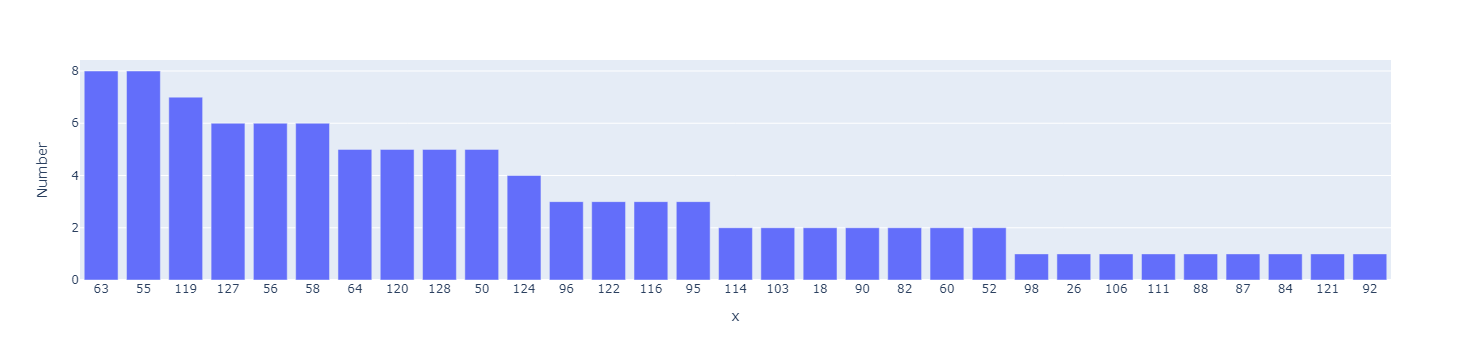

In [279]:
fig = px.bar(df2,x=df2.index.values, y="Number")
fig.show()

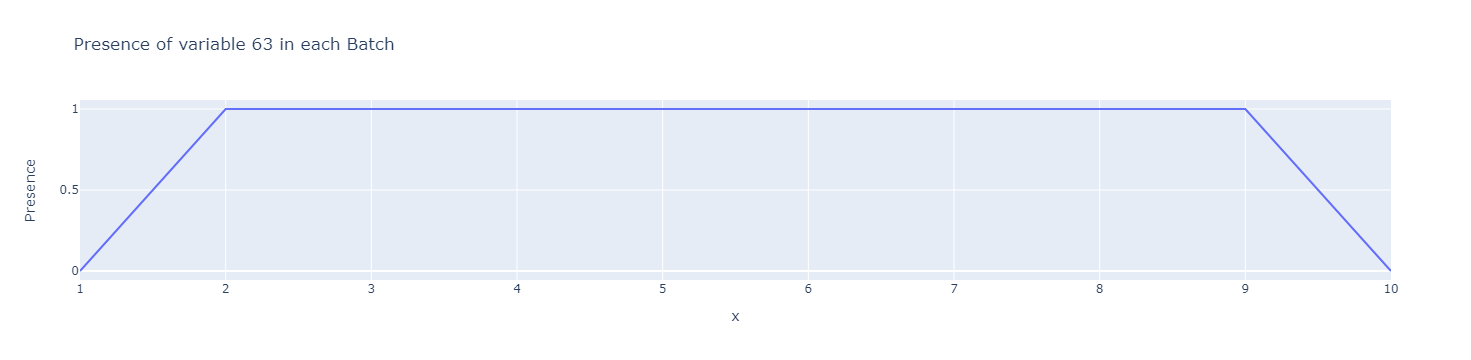

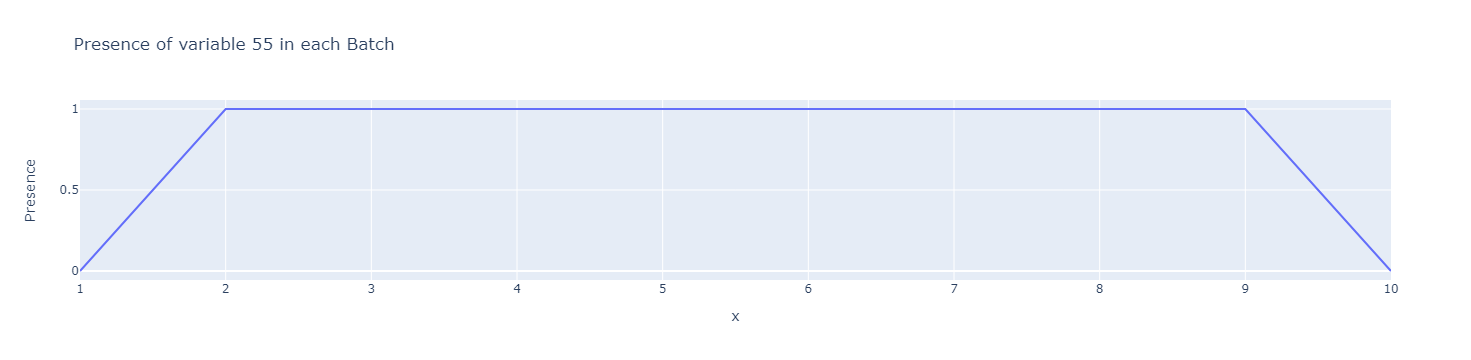

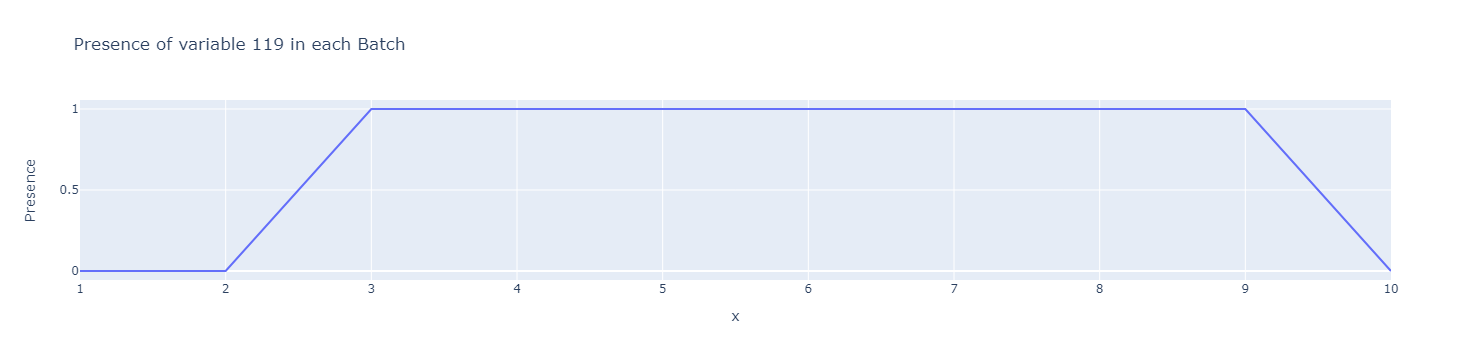

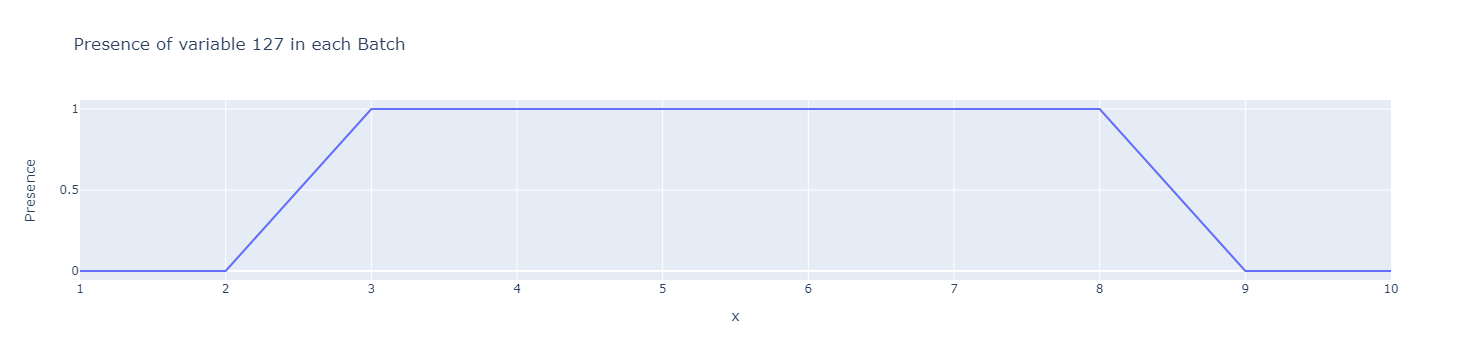

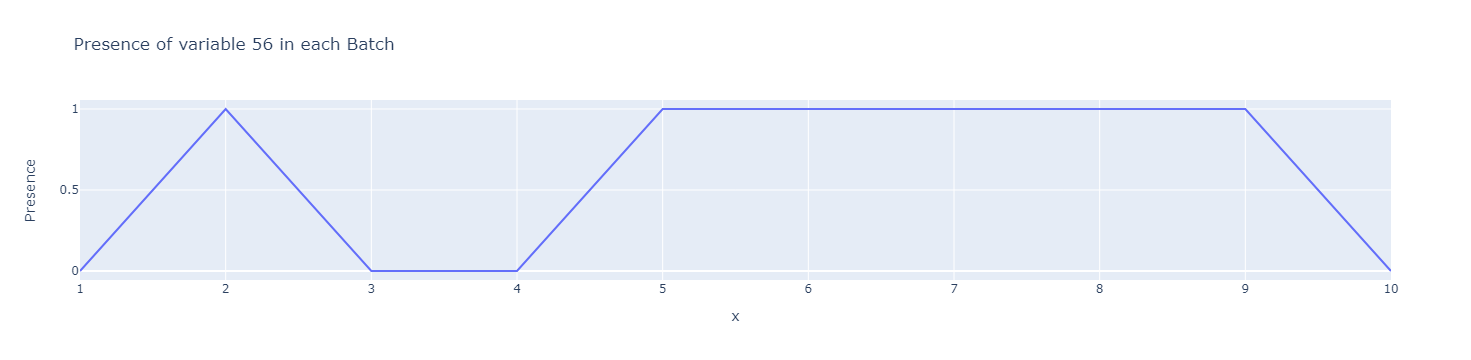

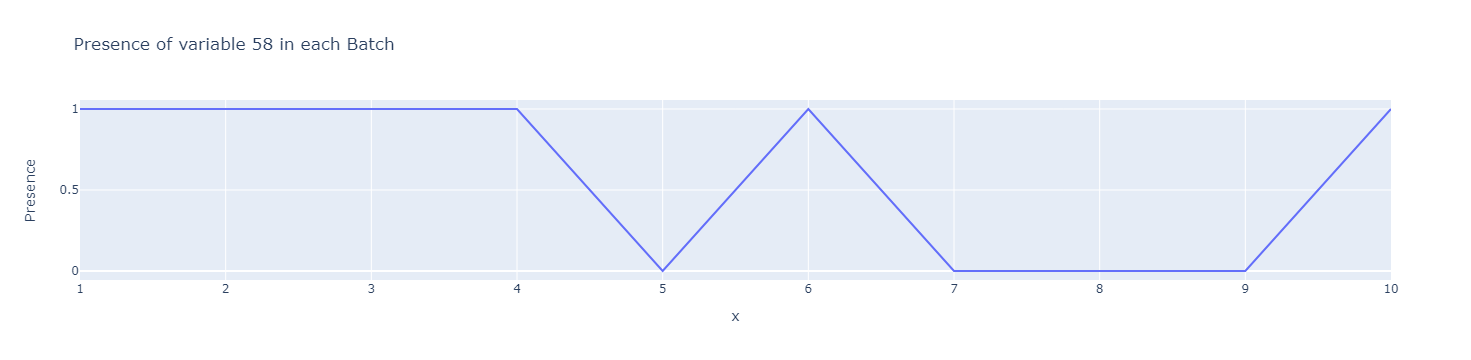

In [320]:
vip = df2.iloc[0:6,:].index.values
for currVip in vip:
    pcaPresence = dict()
    for i in range(0,10):
        X = dataBatches[i].iloc[:,:-1]
        y = dataBatches[i].iloc[:,-1]
        sc = StandardScaler()
        X_scaled = sc.fit_transform(X)
        pca = PCA(n_components=0.9)
        pca.fit(X_scaled)
        sorted_indices = np.argsort(np.absolute(pca.components_[0]))
        pcaPresence[i] = int(currVip) in sorted_indices[::-1][:10]
    df3 = pd.DataFrame.from_dict(pcaPresence,orient ='index')
    df3.columns=["Presence"]
    df3.index = df3.index.values+1
    df3["Presence"]=df3["Presence"].astype(int)
    fig = px.line(df3,x=df3.index.values, y="Presence",title="Presence of variable "+str(currVip)+" in each Batch")
    fig.show()
        


In [26]:
lines[1]

'PMAUC, WAUC, EWAUC, G-mean \n'

In [7]:
source = "Testes/"

In [129]:
def show_scores(textfile,titl):
    with open(source+textfile) as f:
        lines = f.readlines()
    pmauc=[]
    wauc =[]
    ewauc=[]
    gmean=[]
    for i in range(2,len(lines)):
        currLine = lines[i].replace(", \n","")
        currLine = currLine.replace(",","")
        values=currLine.split()
        pmauc.append(values[0])
        wauc.append(values[1])
        ewauc.append(values[2])
        gmean.append(values[3])
    pmauc=pd.to_numeric(pmauc)*100
    wauc=pd.to_numeric(wauc)*100
    ewauc=pd.to_numeric(ewauc)*100
    gmean=pd.to_numeric(gmean)*100

    vals = pd.DataFrame(list(zip(pmauc, wauc,ewauc,gmean)),
                   columns =['pmauc', 'wauc','ewauc','gmean'])

    fig = px.line(vals)
    fig.update_layout(
        yaxis = dict(
            title="Score",
            ticksuffix= "%"
        ),
        xaxis = dict(
            title="Run num"
        ),
        title=titl
    )
    fig.show()
    print("Mean Scores\n")
    print("PMAUC " +str(statistics.mean(vals.loc[:,"pmauc"])))
    print("WAUC " +str(statistics.mean(vals.loc[:,"wauc"])))
    print("EWAUC " +str(statistics.mean(vals.loc[:,"ewauc"])))
    print("GMEAN " +str(statistics.mean(vals.loc[:,"gmean"])))
    print("Highest Scores\n")
    print("PMAUC " +str(max(vals.loc[:,"pmauc"])))
    print("WAUC " +str(max(vals.loc[:,"wauc"])))
    print("EWAUC " +str(max(vals.loc[:,"ewauc"])))
    print("GMEAN " +str(max(vals.loc[:,"gmean"])))
    print("Lowest Scores\n")
    print("PMAUC " +str(min(vals.loc[:,"pmauc"])))
    print("WAUC " +str(min(vals.loc[:,"wauc"])))
    print("EWAUC " +str(min(vals.loc[:,"ewauc"])))
    print("GMEAN " +str(min(vals.loc[:,"gmean"])))


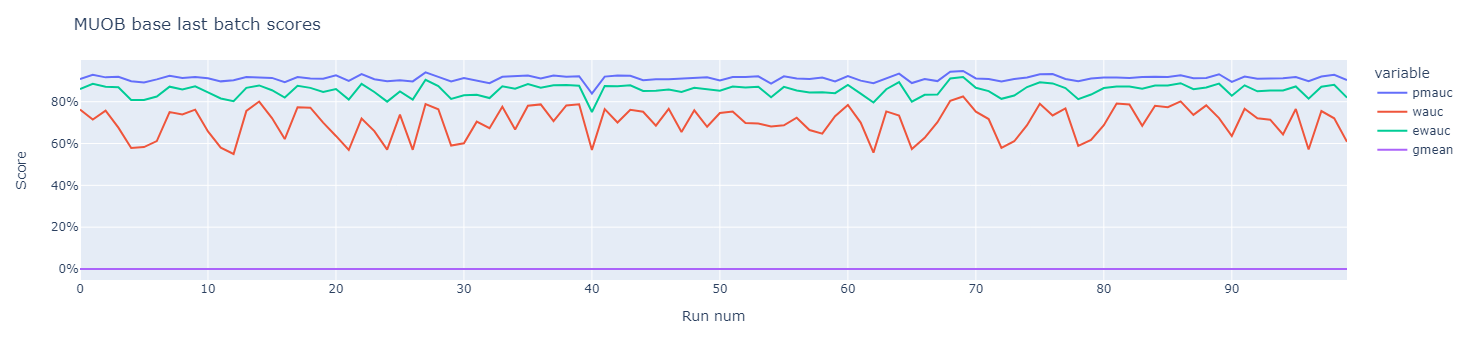

Mean Scores

PMAUC 91.20080012072223
WAUC 70.20966126796569
EWAUC 85.45061554470055
GMEAN 0.0
Highest Scores

PMAUC 94.6734811752646
WAUC 82.50178282704044
EWAUC 91.82076593139669
GMEAN 0.0
Lowest Scores

PMAUC 83.82792550863924
WAUC 54.98997079507245
EWAUC 75.07412779997101
GMEAN 0.0


In [131]:
show_scores('MUOB_EWAUC_window200_lastbatchp_average_perrun.txt',"MUOB base last batch scores")

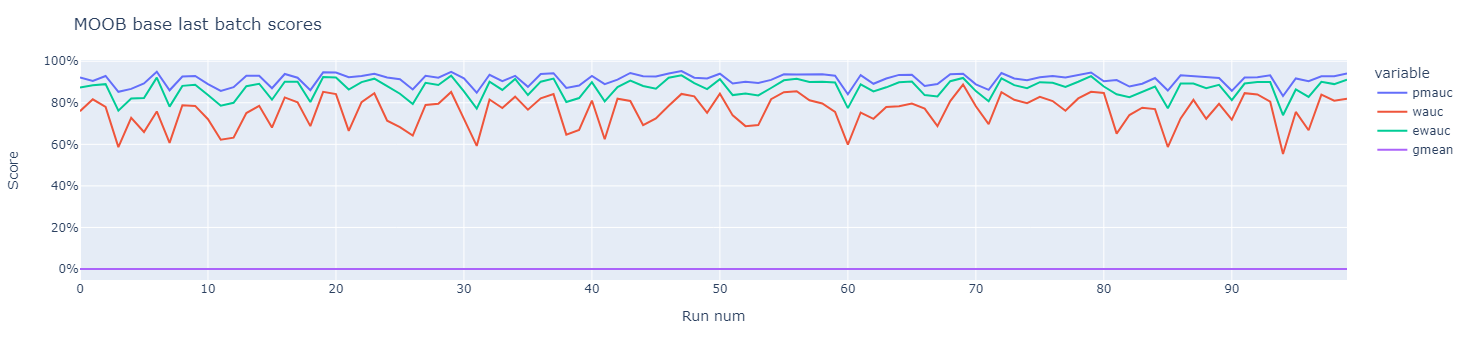

Mean Scores

PMAUC 91.22926239845155
WAUC 75.97473528466124
EWAUC 86.90492511321582
GMEAN 0.0
Highest Scores

PMAUC 95.29189820746892
WAUC 88.78228628779061
EWAUC 93.20084949086436
GMEAN 0.0
Lowest Scores

PMAUC 83.24618810279681
WAUC 55.349743704151344
EWAUC 74.02097251829947
GMEAN 0.0


In [134]:
show_scores('MOOB_EWAUC_window200_lastbatchp_average_perrun.txt',"MOOB base last batch scores")

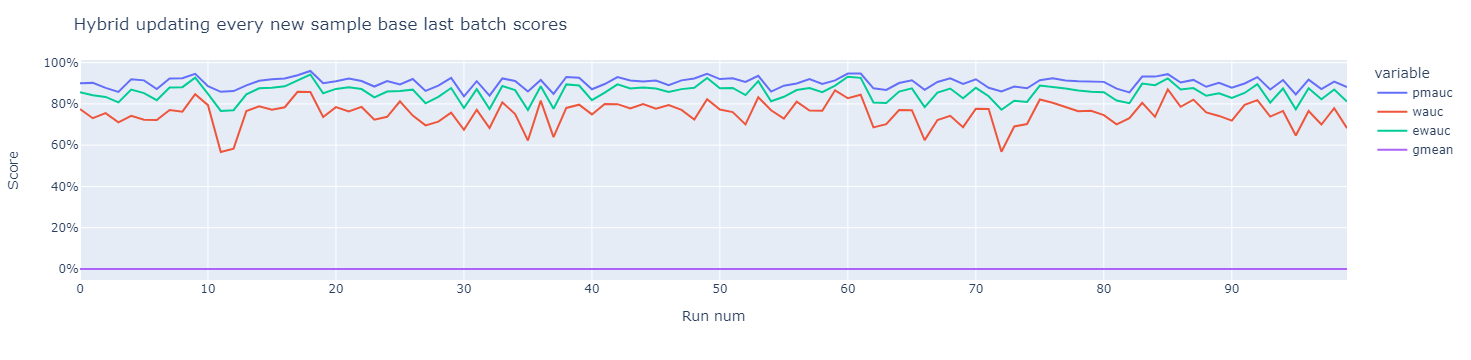

Mean Scores

PMAUC 90.20022572303779
WAUC 75.437758504659
EWAUC 85.54414255616967
GMEAN 0.0
Highest Scores

PMAUC 95.94884850294144
WAUC 87.01540176592594
EWAUC 94.26396964172008
GMEAN 0.0
Lowest Scores

PMAUC 83.6943574096712
WAUC 56.701802519583346
EWAUC 76.62117848804372
GMEAN 0.0


In [133]:
show_scores('HYBRID_EWAUC_window200_lastbatchp_average_perrun.txt',"Hybrid updating every new sample base last batch scores")

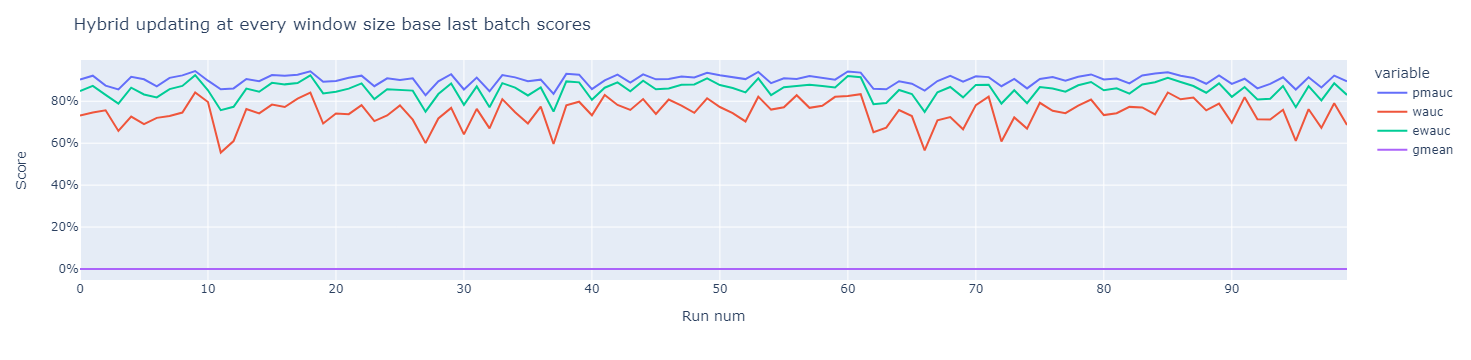

Mean Scores

PMAUC 90.18984573101052
wauc 74.46828787644044
ewauc 85.2116804439813
gmean 0.0
Highest Scores

PMAUC 94.43199984667898
wauc 84.24177858517479
ewauc 92.45551185906639
gmean 0.0
Lowest Scores

PMAUC 82.86405089801406
wauc 55.510144869796186
ewauc 74.91746689234645
gmean 0.0


In [128]:
show_scores('ChangingEveryWindowPasses_HYBRID_EWAUC_window200_lastbatchp_average_perrun.txt',"Hybrid updating at every window size base last batch scores")